In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_excel("/content/titanic3.xls")

# Display the first few rows of the data
print(data.head())



   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

**# Data Exploration**





In [ ]:

print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [ ]:
print(data.isnull().sum())



pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [ ]:
print(data.describe())

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


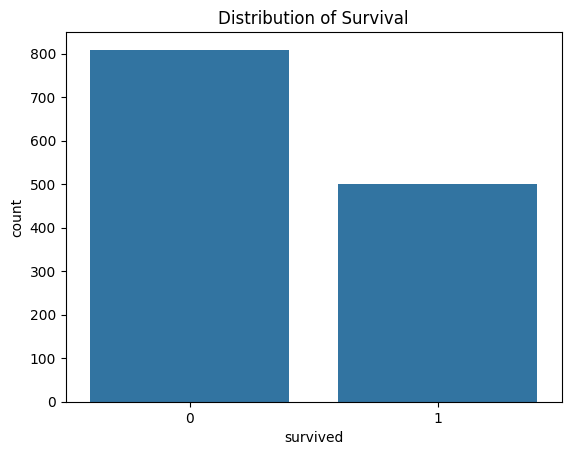

In [ ]:
# Visualize the distribution of survival
sns.countplot(x='survived', data=data)
plt.title('Distribution of Survival')
plt.show()



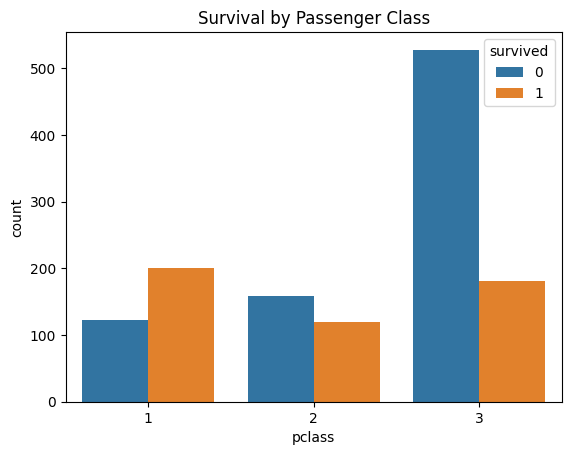

In [ ]:
# Visualize survival by passenger class
sns.countplot(x='pclass', hue='survived', data=data)
plt.title('Survival by Passenger Class')
plt.show()



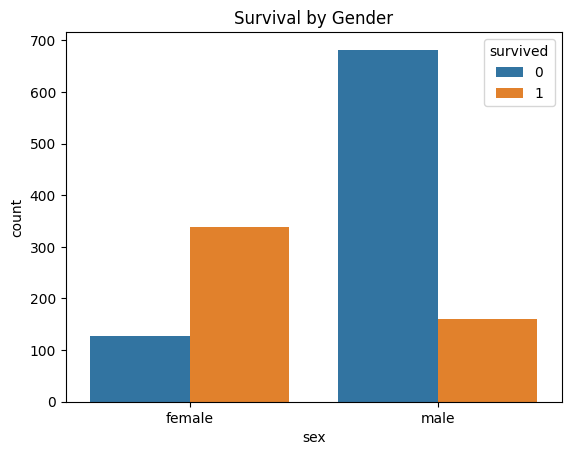

In [ ]:
# Visualize survival by gender
sns.countplot(x='sex', hue='survived', data=data)
plt.title('Survival by Gender')
plt.show()







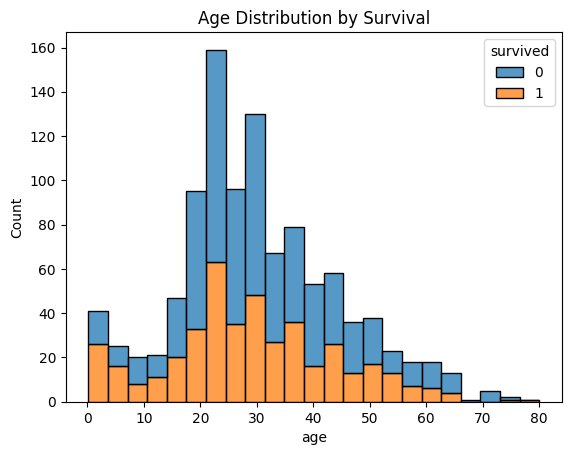

In [ ]:
# Visualize age distribution by survival
sns.histplot(data=data, x='age', hue='survived',multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()

In [ ]:
# Data Preprocessing
# Fill missing values in 'age' with the median age
data['age'].fillna(data['age'].median(), inplace=True)

# Fill missing values in 'embarked' with the mode
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Fill missing values in 'fare' with the median fare
data['fare'].fillna(data['fare'].median(), inplace=True)

In [ ]:
# Feature Engineering
# Convert 'sex' into numerical values: male=0, female=1
data['sex'] = data['sex'].map({'male': 0, 'female': 1})

# Convert 'embarked' into numerical values
data['embarked'] = data['embarked'].map({'C': 0, 'Q': 1, 'S': 2})





In [ ]:
# Drop unnecessary columns
# Drop unnecessary columns
columns_to_drop = ['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data.drop(columns=columns_to_drop, inplace=True)
#data.drop(columns=['name', 'ticket', 'cabin', 'boat', 'body'], inplace=True)

# Define features and target
X = data.drop(columns=['survived'])
y = data['survived']
print(data.head())

   pclass  survived  sex      age  sibsp  parch      fare  embarked
0       1         1  NaN  29.0000      0      0  211.3375       NaN
1       1         1  NaN   0.9167      1      2  151.5500       NaN
2       1         0  NaN   2.0000      1      2  151.5500       NaN
3       1         0  NaN  30.0000      1      2  151.5500       NaN
4       1         0  NaN  25.0000      1      2  151.5500       NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
# Convert data to numeric types (if necessary) and fill any remaining missing values
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_val = X_val.apply(pd.to_numeric, errors='coerce')
X_train.fillna(0, inplace=True)
X_val.fillna(0, inplace=True)

# Train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the validation set
y_pred = model.predict(X_val)

# Model Evaluation
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.68


In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[115  29]
 [ 56  62]]


In [ ]:
class_report = classification_report(y_val, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       144
           1       0.68      0.53      0.59       118

    accuracy                           0.68       262
   macro avg       0.68      0.66      0.66       262
weighted avg       0.68      0.68      0.67       262

